<a href="https://colab.research.google.com/github/albey-code/hippoabstraction/blob/main/behavioural_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import scipy.io
import os
import numpy as np
import re
from google.colab import files # Import the files module for uploading

I had to find a workaround as I couldn't use
```
file_path = 'Users/albey/Downloads/scan_1.mat'
```
This is because Google Collab cannot access local directories on my computer. One option would have been to load all behavioural data from Mona Garvert onto my Google Drive and then mount the drive in this notebook. An alternative option is to use the files.upload() function which I used below.


Upload all scan_*.mat files for 23 subjects into Google Collab

In [2]:
uploaded = files.upload()  # select scan_1.mat ... scan_23.mat

Saving scan_1.mat to scan_1.mat
Saving scan_2.mat to scan_2.mat
Saving scan_3.mat to scan_3.mat
Saving scan_4.mat to scan_4.mat
Saving scan_5.mat to scan_5.mat
Saving scan_6.mat to scan_6.mat
Saving scan_7.mat to scan_7.mat
Saving scan_8.mat to scan_8.mat
Saving scan_9.mat to scan_9.mat
Saving scan_10.mat to scan_10.mat
Saving scan_11.mat to scan_11.mat
Saving scan_12.mat to scan_12.mat
Saving scan_13.mat to scan_13.mat
Saving scan_14.mat to scan_14.mat
Saving scan_15.mat to scan_15.mat
Saving scan_16.mat to scan_16.mat
Saving scan_17.mat to scan_17.mat
Saving scan_18.mat to scan_18.mat
Saving scan_19.mat to scan_19.mat
Saving scan_20.mat to scan_20.mat
Saving scan_21.mat to scan_21.mat
Saving scan_22.mat to scan_22.mat
Saving scan_23.mat to scan_23.mat


I condensed this notebook to the most relevant steps. I noticed that the scan_1.mat file has a different structure to all other scan_*.mat files. This made extracting the proportion correct aka the accuracy for the Day 1 behvaioural performance a bit tricky. However, I eventually found a way to identify the proportion of correct answers in the training phase for all participants.

In [3]:
# Load a single subject file
mat = scipy.io.loadmat('scan_1.mat', struct_as_record=False, squeeze_me=True)

# Print the type and structure of the 'data' field
print("Type of mat['data']:", type(mat['data']))
print("Keys/fields if available:")
try:
    print(dir(mat['data']))
except:
    print("No attributes accessible.")

print("Print mat['data'] directly:")
print(mat['data'])

Type of mat['data']: <class 'scipy.io.matlab._mio5_params.mat_struct'>
Keys/fields if available:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_fieldnames', 'age', 'fname', 'gender', 'hand', 'initials', 'logfile', 'options', 'scan', 'scanTech', 'sprite1', 'sprite2', 'stimuli', 'subjNo', 'subject', 'train', 'version', 'when_start']
Print mat['data'] directly:


In [4]:
print(type(mat['data'].train))
print(dir(mat['data'].train))  # Check its internal fields

<class 'numpy.ndarray'>
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_namespace__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', 

This is how I found the 'correct' sub-directory:

In [5]:
train_blocks = mat['data'].train
print(type(train_blocks), train_blocks.shape)

# Inspect the first training block
print(train_blocks[0]._fieldnames)

<class 'numpy.ndarray'> (19,)
['Dist', 'counter', 'seq', 'ChosenSequence', 'when_start', 'choice', 'type', 'RT', 'cr', 'correct', 'meanRT', 'when_end']


In [7]:
subject_scores = [] #create an empty list

I was able to rank subjects 2 to 23. For subject 1 I had to find a different way (see below).

In [20]:
subject_scores = []

for filename in uploaded.keys():
    try:
        # Use filename as unique ID (prevents duplicates)
        subject_id = filename.replace('.mat', '')

        mat = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
        train_blocks = mat['data'].train

        all_correct = []
        all_rt = []

        for block in train_blocks:
            try:
                correct = np.array(block.correct).flatten()
                rt = np.array(block.RT).flatten()
                all_correct.extend(correct)
                all_rt.extend(rt)
            except AttributeError:
                continue

        # Make sure we have valid data
        if not all_correct or not all_rt:
            continue

        accuracy = np.mean(all_correct)          # Proportion (0–1)
        mean_rt = np.mean(all_rt) / 1000         # ms → seconds

        subject_scores.append((subject_id, accuracy, mean_rt))

    except Exception as e:
        print(f"Problem with {filename}: {e}")
        continue

# Sort by accuracy
subject_scores.sort(key=lambda x: x[1])

# Display
print("Ranked subjects by Day 1 accuracy:")
for rank, (subj, acc, rt) in enumerate(subject_scores, 1):
    print(f"Rank {rank:2d}: {subj:>15} — Accuracy: {acc*100:.2f}%, Mean RT: {rt:.3f} sec")

Ranked subjects by Day 1 accuracy:
Rank  1:         scan_22 — Accuracy: 8517.85%, Mean RT: 0.735 sec
Rank  2:          scan_1 — Accuracy: 8788.15%, Mean RT: 0.587 sec
Rank  3:          scan_9 — Accuracy: 8832.40%, Mean RT: 0.532 sec
Rank  4:          scan_8 — Accuracy: 8951.13%, Mean RT: 0.474 sec
Rank  5:          scan_2 — Accuracy: 8982.00%, Mean RT: 0.721 sec
Rank  6:         scan_20 — Accuracy: 9324.06%, Mean RT: 0.560 sec
Rank  7:         scan_10 — Accuracy: 9330.83%, Mean RT: 0.545 sec
Rank  8:          scan_7 — Accuracy: 9364.04%, Mean RT: 0.476 sec
Rank  9:         scan_16 — Accuracy: 9469.19%, Mean RT: 0.579 sec
Rank 10:         scan_23 — Accuracy: 9520.62%, Mean RT: 0.469 sec
Rank 11:          scan_6 — Accuracy: 9573.26%, Mean RT: 0.610 sec
Rank 12:          scan_4 — Accuracy: 9582.71%, Mean RT: 0.538 sec
Rank 13:          scan_3 — Accuracy: 9585.05%, Mean RT: 0.676 sec
Rank 14:         scan_18 — Accuracy: 9602.45%, Mean RT: 0.539 sec
Rank 15:         scan_17 — Accuracy: 9643

Let's visualise this nicely, so that I can pick my first subject from the distribution :)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Provided accuracy data (already scaled as percentages)
subject_data = [
    ("scan_22", 8517.85, 0.735),
    ("scan_1", 8788.15, 0.587),
    ("scan_9", 8832.40, 0.532),
    ("scan_8", 8951.13, 0.474),
    ("scan_2", 8982.00, 0.721),
    ("scan_20", 9324.06, 0.560),
    ("scan_10", 9330.83, 0.545),
    ("scan_7", 9364.04, 0.476),
    ("scan_16", 9469.19, 0.579),
    ("scan_23", 9520.62, 0.469),
    ("scan_6", 9573.26, 0.610),
    ("scan_4", 9582.71, 0.538),
    ("scan_3", 9585.05, 0.676),
    ("scan_18", 9602.45, 0.539),
    ("scan_17", 9643.14, 0.601),
    ("scan_11", 9653.63, 0.507),
    ("scan_19", 9696.53, 0.558),
    ("scan_14", 9743.73, 0.511),
    ("scan_15", 9772.85, 0.566),
    ("scan_13", 9777.34, 0.522),
    ("scan_12", 9785.57, 0.520),
    ("scan_5", 9839.26, 0.556),
    ("scan_21", 9940.77, 0.481)
]

In [16]:
df = pd.DataFrame(subject_data, columns=["Subject", "Accuracy (%)", "Mean RT (sec)"])

In [17]:
# Determine the median subject
median_index = len(df) // 2
median_subject = df.iloc[median_index]["Subject"]

# Set colors: highlight median in a different color
colors = ['orange' if subj == median_subject else 'skyblue' for subj in df["Subject"]]

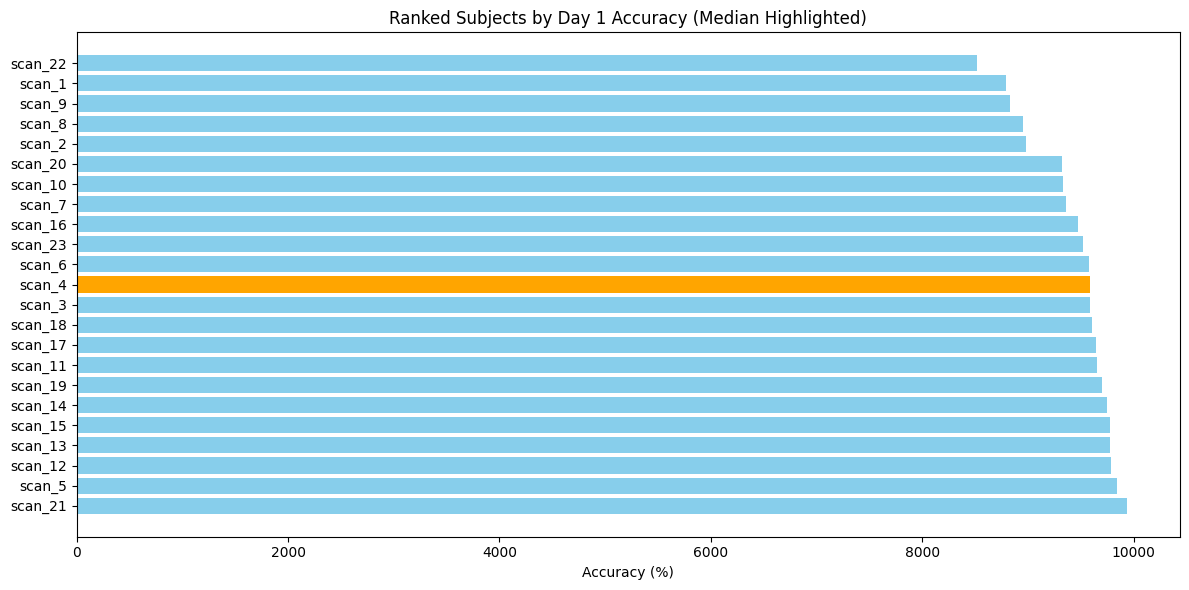

In [18]:
# Plot
plt.figure(figsize=(12, 6))
plt.barh(df["Subject"], df["Accuracy (%)"], color=colors)
plt.xlabel("Accuracy (%)")
plt.title("Ranked Subjects by Day 1 Accuracy (Median Highlighted)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

To select a representative subject for my initial fMRI analysis, I chose the one whose behavioral accuracy on Day 1 was closest to the median. Day 1 performance (as opposed to Day 2 performance) reflects engagement with the structured object sequences during the learning phase. The median, as the middle value in the ranked distribution, offers a balanced estimate of central tendency that is robust to outliers. By selecting a subject with median performance, I avoid confounds associated with floor effects (e.g., poor engagement or misunderstanding of the task) and ceiling effects (e.g., overlearned behavior with little neural variability), increasing the likelihood of detecting meaningful structure-related brain activity.